# Exploring data in JARVIS-DFT

In [40]:
from monty.serialization import loadfn, MontyDecoder,MontyEncoder
import matplotlib.pyplot as plt
plt.switch_backend('agg')
import json,math,os
import numpy as np
import pandas as pd
import pprint

# Download 3D material data from https://figshare.com/articles/jdft_3d-7-7-2018_json/6815699
# Download 2D material data from https://figshare.com/articles/jdft_2d-7-7-2018_json/6815705 

# Website: https://jarvis.nist.gov
# https://www.nature.com/articles/s41598-017-05402-0
# https://www.nature.com/articles/sdata201882
# https://journals.aps.org/prb/abstract/10.1103/PhysRevB.98.014107

# NIST-disclaimer: https://www.nist.gov/disclaimer

In [3]:
dat_3d=loadfn('jdft_3d-7-7-2018.json',cls=MontyDecoder)
dat_2d=loadfn('jdft_2d-7-7-2018.json',cls=MontyDecoder)

In [53]:
# Size of the data
len(dat_3d),len(dat_2d)

(25923, 636)

In [5]:
#Available keys

In [5]:
dat_3d[0].keys()

dict_keys(['magmom', 'eff_mass', 'gv', 'elastic', 'icsd', 'kpoints', 'op_gap', 'encut', 'incar', 'epsy', 'fin_en', 'form_enp', 'kv', 'epsz', 'mepsz', 'final_str', 'epsx', 'mepsy', 'kp_leng', 'mbj_gap', 'initial_str', 'jid', 'mpid', 'mepsx'])

In [6]:
dat_2d[0].keys()

dict_keys(['magmom', 'exfoliation_en', 'epsz', 'mepsz', 'mbj_gap', 'final_str', 'kpoints', 'epsx', 'op_gap', 'mepsx', 'elastic', 'incar', 'initial_str', 'mepsy', 'phi', 'epsy', 'fin_en', 'jid', 'mpid', 'form_enp'])

In [13]:
dat_2d[0].keys()

dict_keys(['magmom', 'incar', 'epsz', 'fin_en', 'exfoliation_en', 'final_str', 'mepsz', 'jid', 'epsy', 'kpoints', 'mpid', 'mepsy', 'form_enp', 'elastic', 'epsx', 'mepsx', 'op_gap', 'initial_str', 'phi', 'mbj_gap'])

In [ ]:
# form_enp: formation energy per atom (eV/atom)
# op_gap: OptB88vdW functional based bandgap (eV)
# mbj_gap: TBmBJ functional based bandgap (eV)
# kv: Voigt bulk mod. (GPa)
# gv: Shear bulk mod. (GPa)
# elastic: elastic tensor instring format, use the function 'get_et' to convert into pymatgen elastictensor object
# epsx: Static dielctric function value in x-direction based on OptB88vdW (no unit)
# mepsx: Static dielctric function value in x-direction based on TBmBJ (no unit)
#magmom: Magnetic moment (Bohr magneton) [from OUTCAR and from OSZICAR], generally OSZICAR value is preferred
# kp_len: Kpoint automatic line density obtained after automatic convergence (Angstrom), substract 25 because 5 extra points were taken during convergence
# encut: Plane wave cut-off value obtained after automatic convergence
# exfoliation_en: exfoliation energy
# phi: work-function related values
# final_str: final structure after relaxation with OptB88vdW
# eff_mass: effective mass with BoltzTrap at 300K
#'na' signifies non-available data

In [26]:
pprint.pprint(dat_3d[0])

{'eff_mass': {'n': [6.023889743488937e-07,
                    6.023889743488937e-07,
                    6.023889743488937e-07],
              'p': [6.023889743488937e-07,
                    6.023889743488937e-07,
                    6.023889743488937e-07]},
 'elastic': '134.2,227.2,227.2,-0.0,0.0,0.0,227.2,134.2,227.2,-0.0,-0.0,-0.0,227.2,227.2,134.2,0.0,-0.0,0.0,-0.0,-0.0,0.0,149.7,0.0,0.0,0.0,-0.0,-0.0,0.0,149.7,0.0,0.0,-0.0,0.0,0.0,0.0,149.7',
 'encut': 600,
 'epsx': 'na',
 'epsy': 'na',
 'epsz': 'na',
 'fin_en': -5.4309751,
 'final_str': Structure Summary
Lattice
    abc : 2.8018838472201355 2.8018838472201355 2.8018838472201355
 angles : 90.0 90.0 90.0
 volume : 21.996337903898066
      A : 2.8018838472201355 -0.0 0.0
      B : -0.0 2.8018838472201355 0.0
      C : -0.0 -0.0 2.8018838472201355
PeriodicSite: Co (1.4009, 1.4009, 1.4009) [0.5000, 0.5000, 0.5000]
PeriodicSite: Ni (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000],
 'form_enp': 0.161,
 'gv': 71.22,
 'icsd': '[187983]

In [28]:
pprint.pprint(dat_2d[0])

{'elastic': '63.6,11.1,-0.0,0.0,0.0,-0.0,11.1,63.6,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.1,0.0,0.0,0.0,0.0,0.0,0.0,24.7,0.0,0.0,0.0,0.0,0.0,0.0,-0.2,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.2',
 'epsx': 10.3295,
 'epsy': 10.3295,
 'epsz': 7.0367,
 'exfoliation_en': 63.593833333333016,
 'fin_en': -29.107834,
 'final_str': Structure Summary
Lattice
    abc : 3.6673053432782647 3.6673053432782647 27.311209000000002
 angles : 90.0 90.0 90.0
 volume : 367.31195880800033
      A : 3.6673053432782647 0.0 0.0
      B : 0.0 3.6673053432782647 0.0
      C : 0.0 0.0 27.311209000000002
PeriodicSite: Hf (1.4932, 3.3269, 7.2626) [0.4072, 0.9072, 0.2659]
PeriodicSite: Hf (3.3269, 1.4932, 3.0486) [0.9072, 0.4072, 0.1116]
PeriodicSite: Si (3.3269, 3.3269, 5.1556) [0.9072, 0.9072, 0.1888]
PeriodicSite: Si (1.4932, 1.4932, 5.1556) [0.4072, 0.4072, 0.1888]
PeriodicSite: Te (3.3269, 1.4932, 8.6591) [0.9072, 0.4072, 0.3171]
PeriodicSite: Te (1.4932, 3.3269, 1.6521) [0.4072, 0.9072, 0.0605],
 'form_enp': -0.624,
 'incar': {'AG

In [49]:
#Avilable data 
keys=['gv','kv','fin_en','op_gap','mbj_gap','magmom','epsx','epsy','epsz','mepsx','mepsy','mepsz','eff_mass','form_enp']
info={}
for i in dat_3d:
  for j in keys:
     if i[j]!='na' and i[j]!={}:
            info.setdefault(j, []).append(i['jid'])


In [50]:
for i,j in info.items():
    print (i,len(j))

magmom 24312
kv 11237
eff_mass 25923
epsz 19311
gv 11045
mbj_gap 7349
mepsy 8055
epsx 19027
op_gap 23455
mepsz 8243
epsy 19039
fin_en 25923
mepsx 8043
form_enp 25923


In [9]:
# Compare Optb88vdW and TbmBJ
%matplotlib inline
from matplotlib import pyplot as plt

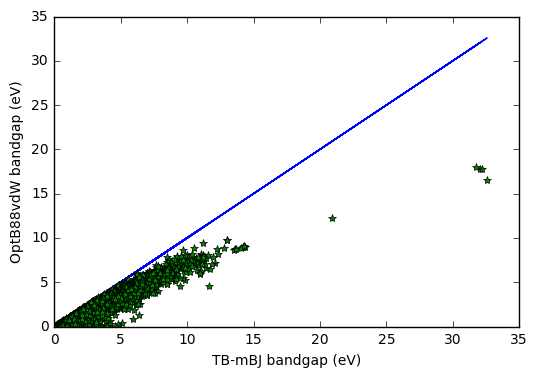

In [10]:
fig, ax = plt.subplots()
mbj=[]
opt=[]
for i in dat_3d:
    if i['op_gap']!='na' and i['mbj_gap']!='na':
        opt.append(i['op_gap'])
        mbj.append(i['mbj_gap'])
        
plt.plot(mbj,mbj)
plt.plot(mbj,opt,'*')
plt.xlabel('TB-mBJ bandgap (eV)')
plt.ylabel('OptB88vdW bandgap (eV)')

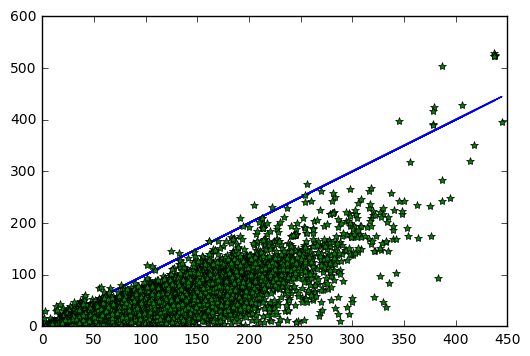

In [12]:
# Compare bulk vs shear modulus (Voigt)
plt.close()
fig, ax = plt.subplots()
kv=[]
gv=[]
for i in dat_3d:
    if i['kv']!='na' and i['gv']!='na':
      if i['kv']>0 and i['gv']>0:
        kv.append(i['kv'])
        gv.append(i['gv'])
        
plt.plot(kv,kv)
plt.plot(kv,gv,'*')

In [16]:
# Get elastic tensor object
from pymatgen.analysis.elasticity.elastic import ElasticTensor
def get_et(elast_str=''):
    cij=np.empty((6, 6), dtype=float)
    elast=np.array(elast_str.split(','),dtype='float')
    count=0
    for ii in range(6):
      for jj in range(6):
       cij[ii][jj]=elast[count]
       count=count+1
    et=ElasticTensor.from_voigt(cij)
    return et

In [44]:
#Example of getting elastic tensor object
x=dat_3d[0]
el_tens=get_et(x['elastic'])
print (el_tens)
print ('Poisson ratio, anisotropy',el_tens.homogeneous_poisson, el_tens.universal_anisotropy)
print ('ids',x['jid'],x['mpid'],x['final_str'].composition.reduced_formula)

[[[[ 134.2    0.     0. ]
   [   0.   227.2   -0. ]
   [   0.    -0.   227.2]]

  [[   0.   149.7    0. ]
   [ 149.7   -0.     0. ]
   [   0.     0.     0. ]]

  [[   0.     0.   149.7]
   [   0.    -0.     0. ]
   [ 149.7    0.    -0. ]]]


 [[[   0.   149.7    0. ]
   [ 149.7   -0.     0. ]
   [   0.     0.     0. ]]

  [[ 227.2   -0.    -0. ]
   [  -0.   134.2   -0. ]
   [  -0.    -0.   227.2]]

  [[  -0.     0.     0. ]
   [   0.    -0.   149.7]
   [   0.   149.7    0. ]]]


 [[[   0.     0.   149.7]
   [   0.    -0.     0. ]
   [ 149.7    0.    -0. ]]

  [[  -0.     0.     0. ]
   [   0.    -0.   149.7]
   [   0.   149.7    0. ]]

  [[ 227.2    0.    -0. ]
   [   0.   227.2    0. ]
   [  -0.     0.   134.2]]]]
Poisson ratio, anisotropy 0.713119611345 -6.63597129743
ids JVASP-11946 mp-1006883 CoNi


In [ ]:
# Using pandas dataframe

In [29]:
jid, opgap, mbjgap, energy, magmom, exfen, url =[],[],[],[],[],[],[]

In [30]:
dat_2d[0]['magmom']

{'magmom_osz': -0.0, 'magmom_out': -6.5e-06}

In [31]:
for i in dat_2d:
    jid.append(i['jid'])
    opgap.append(i['op_gap'])
    mbjgap.append(i['mbj_gap'])
    if i["magmom"]!={}:
      magmom.append(i["magmom"]['magmom_osz'])
    else:
        magmom.append('na')
    energy.append(i['fin_en'])
    exfen.append(i['exfoliation_en'])
    url.append(str("https://www.ctcms.nist.gov/~knc6/jsmol/")+str(i['jid'])+str(".html"))

In [45]:
headers = ['JARVIS_ID','OPT_Gap','MBJ_Gap','Magnetic_moment','Final_Energy','Exfoliation_Energy','URL']

In [46]:
df = pd.DataFrame([jid,opgap,mbjgap,magmom,energy,exfen,url])

In [47]:
df = df.transpose()
df.columns = headers

In [48]:
df.head()


,JARVIS_ID,OPT_Gap,MBJ_Gap,Magnetic_moment,Final_Energy,Exfoliation_Energy,URL
0,JVASP-19990,0.0341,na,-0,-29.1078,63.5938,https://www.ctcms.nist.gov/~knc6/jsmol/JVASP-1...
1,JVASP-31349,0.7467,na,-0,-11.7027,134.864,https://www.ctcms.nist.gov/~knc6/jsmol/JVASP-3...
2,JVASP-27890,0.0023,na,-0.0004,-29.7668,43.1147,https://www.ctcms.nist.gov/~knc6/jsmol/JVASP-2...
3,JVASP-31353,0.0266,na,0.0007,-0.129676,240.715,https://www.ctcms.nist.gov/~knc6/jsmol/JVASP-3...
4,JVASP-31356,0.0484,na,0,-20.465,67.4428,https://www.ctcms.nist.gov/~knc6/jsmol/JVASP-3...


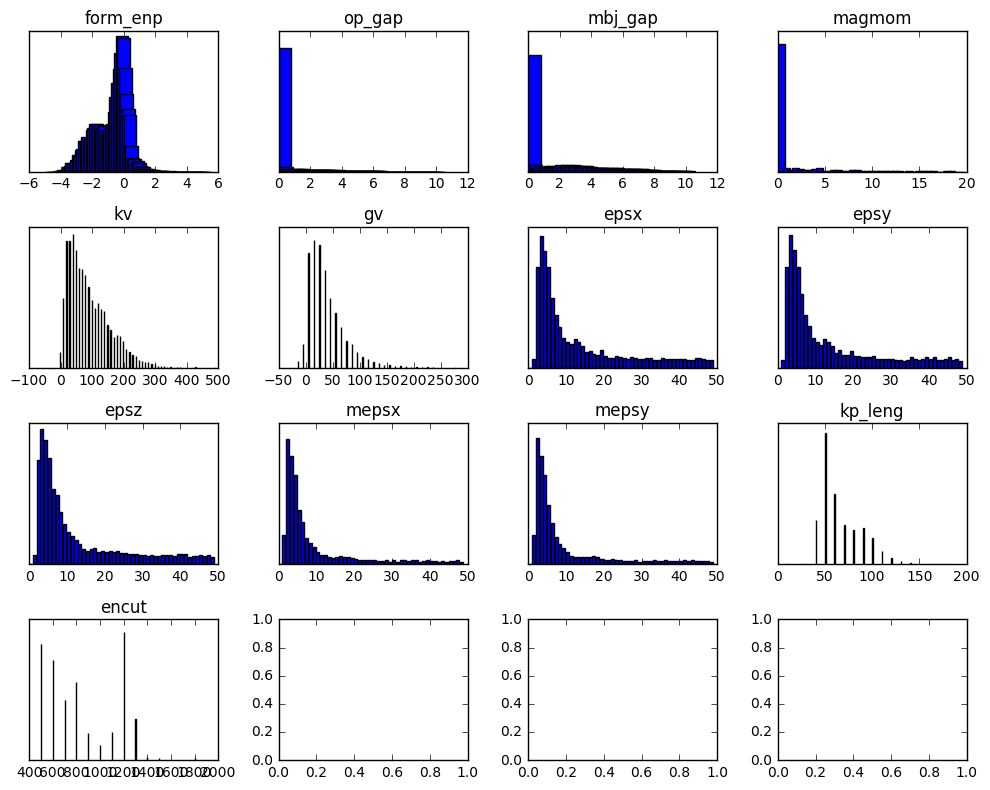

In [38]:
fig, ax = plt.subplots(figsize=(10,8),nrows=4, ncols=4)
props={'form_enp':[ax[0,0],.1,[-5,5]],'op_gap':[ax[0,1],.1,[0,10]],'mbj_gap':[ax[0,2],.1,[0,10]],'magmom':[ax[0,3],.5,[0,20]],'kv':[ax[1,0],10,[-2,500]],'gv':[ax[1,1],10,[-15,300]],'epsx':[ax[1,2],1,[0,50]],'epsy':[ax[1,3],1,[0,50]],'epsz':[ax[2,0],1,[0,50]],'mepsx':[ax[2,1],1,[0,50]],'mepsy':[ax[2,2],1,[0,50]],'kp_leng':[ax[2,3],10,[10,200]],'encut':[ax[3,0],100,[400,2000]]}

info={}
for i in dat_3d:
 for j in props.keys():
    if i[j]!='na' and i[j]!={} :
      if j=='magmom':
        val=i['magmom']['magmom_osz']
      else:
       if not math.isinf(i[j]):
         val=i[j]
      info.setdefault(j, []).append(val)


for i,j in info.items():
  
  max_val=props[i][2][1]
  min_val=props[i][2][0]
  interval=props[i][1]
  hist, bins = np.histogram(j,bins=np.arange(min_val, max_val , interval), density=False)
  ax=props[i][0]
  ax.bar(bins[:-1],hist)
  ax.set_title(i)
  ax.set_yticks([])

plt.tight_layout()



In [56]:
for i in dat_2d:
    print (i['phi'])
    break

{'phi': 4.926018912256186, 'scf_vbm': -0.3602, 'scf_dir': False, 'nelect': 40, 'scf_gap': 0.03400000000000003, 'scf_cbm': -0.3262, 'Ef': -0.67393613, 'avg_max': 4.252082782256187}
